In [34]:
import os
import pandas as pd
import pandas
# ! pip install boto3
# import boto3
from os import listdir
from os.path import isfile, join
import plotly.express as px
import seaborn as sns
from os import listdir
from os.path import isfile, join
from math import sin, cos, sqrt, atan2


In [4]:
path="data/citydata/ma/2021/06"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

Files and directories in ' data/citydata/ma/2021/06 ' :
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


In [5]:

path="data/citydata/ma/2021/06"
fichiers = [f for f in listdir(path) if isfile(join(path, f))]

In [6]:
dictionnaire={}
for rep in listdir(path):
    onlyfiles = [f for f in listdir(path+'/'+rep) if isfile(join(path+'/'+rep, f))]
    dictionnaire[rep]=onlyfiles

In [9]:
df=pd.DataFrame()
for day in dictionnaire.keys():
    for file in listdir(path+'/'+day+"/"):
        df_tmp = pd.read_csv(path+'/'+day+'/'+file, compression='gzip', header=None, sep=',', quotechar='"',low_memory=False).iloc[:,:5]
        df=pd.concat([df, df_tmp])
    

In [10]:
df=df.iloc[:,:5]
df.rename(columns={0:'device_id', 2:'latitude', 3: 'longitude',  4: 'timestamp' }, inplace=True)
df=df[['device_id', 'latitude','longitude','timestamp']]

df['datetime']=pd.to_datetime(df['timestamp'], unit='s')
df['hour'] = df.datetime.dt.hour
df['day'] = df.datetime.dt.day
df['date'] = df.datetime.dt.date
df.drop(columns='timestamp', inplace=True)
df

,device_id,latitude,longitude,datetime,hour,day,date
0,NGRtM2lhN3FtcWNyOTpmaXNpNm5sajJkdmQ5,30.388058,-9.420253,2021-05-31 22:04:38,22,31,2021-05-31
1,NGRtM2lhN3FtcWNyOTpmaXNpNm5sajJkdmQ5,30.388058,-9.420253,2021-05-31 22:06:09,22,31,2021-05-31
2,MzZuN2I5dDVqODhmODp2ZjVoNGtsc24wMW4=,32.036022,-3.050241,2021-05-31 21:10:54,21,31,2021-05-31
3,ZGxlOXFiNGxqZDM5OTpmcGE4cHB1cnM2cTNk,32.308627,-9.211986,2021-05-31 22:24:38,22,31,2021-05-31
4,ZHMzNHFsMmk3NjloNzozbDlrOTVwcGdmbjM4,33.564917,-7.572878,2021-05-31 21:04:15,21,31,2021-05-31
...,...,...,...,...,...,...,...
2455144,MnNnZDZjbWM5NHViczpkcjcwZTlqM2l1Nm0x,35.749715,-5.794415,2021-06-30 13:16:33,13,30,2021-06-30
2455145,NWFpNjJsdmVldjU5bDo2Nm42bmw1bHByNzQz,35.756844,-5.801536,2021-06-30 16:48:17,16,30,2021-06-30
2455146,MmVnMTNwNWY0N2NubjpkM2huM2ZwdGZtb2Ey,35.761161,-5.840499,2021-06-30 13:16:14,13,30,2021-06-30
2455147,YjhwMzFmNmIwb3UycTo5bGcyc2hva3FyaWwx,35.768578,-5.823996,2021-06-30 13:16:04,13,30,2021-06-30


In [11]:
df

,device_id,latitude,longitude,datetime,hour,day,date
0,NGRtM2lhN3FtcWNyOTpmaXNpNm5sajJkdmQ5,30.388058,-9.420253,2021-05-31 22:04:38,22,31,2021-05-31
1,NGRtM2lhN3FtcWNyOTpmaXNpNm5sajJkdmQ5,30.388058,-9.420253,2021-05-31 22:06:09,22,31,2021-05-31
2,MzZuN2I5dDVqODhmODp2ZjVoNGtsc24wMW4=,32.036022,-3.050241,2021-05-31 21:10:54,21,31,2021-05-31
3,ZGxlOXFiNGxqZDM5OTpmcGE4cHB1cnM2cTNk,32.308627,-9.211986,2021-05-31 22:24:38,22,31,2021-05-31
4,ZHMzNHFsMmk3NjloNzozbDlrOTVwcGdmbjM4,33.564917,-7.572878,2021-05-31 21:04:15,21,31,2021-05-31
...,...,...,...,...,...,...,...
2455144,MnNnZDZjbWM5NHViczpkcjcwZTlqM2l1Nm0x,35.749715,-5.794415,2021-06-30 13:16:33,13,30,2021-06-30
2455145,NWFpNjJsdmVldjU5bDo2Nm42bmw1bHByNzQz,35.756844,-5.801536,2021-06-30 16:48:17,16,30,2021-06-30
2455146,MmVnMTNwNWY0N2NubjpkM2huM2ZwdGZtb2Ey,35.761161,-5.840499,2021-06-30 13:16:14,13,30,2021-06-30
2455147,YjhwMzFmNmIwb3UycTo5bGcyc2hva3FyaWwx,35.768578,-5.823996,2021-06-30 13:16:04,13,30,2021-06-30


In [88]:
df.day.value_counts()

5     3128505
8     2689326
19    2637674
12    2429167
29    2330829
30    2325749
23    2256486
14    2249664
20    2143615
28    2110830
26    2084584
10    2071402
13    1970235
25    1933004
6     1932067
22    1805017
27    1757186
9     1731067
11    1653511
24    1551320
16    1339816
18    1300273
21    1247762
3     1142411
17    1032236
15     979385
7      912985
1      760114
4      686289
2      669278
31     161533
Name: day, dtype: int64

In [12]:
df.to_csv('data/citydata'+'/macro_table_citydata.csv', index=False)

### Analyse des données du 7 juin 2021 entre midi et 2

In [26]:
df=pd.read_csv('data/citydata'+'/macro_table_citydata.csv')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,OHNhMXJsZTJkZDBubDo3ZXZydTFsbDdiZ3B0,0,27.152379,-13.189101,1625052789,13,samsung,SM-G965F,604-01,102.78.208.122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f5530c2e233195
1,OHNhMXJsZTJkZDBubDo3ZXZydTFsbDdiZ3B0,0,27.152379,-13.189101,1625055357,10,samsung,SM-G965F,604-01,102.78.74.192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f5530c2e233195
2,OHNhMXJsZTJkZDBubDo3ZXZydTFsbDdiZ3B0,0,27.152379,-13.189101,1625052130,8,samsung,SM-G965F,604-01,102.78.208.122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f5530c2e233195
3,M2o4NmwxbWRiMjl1ZDo3MTFycnJwY2w4Z2dv,0,30.341814,-5.838499,1625063389,4,samsung,SM-N960F,604-01,160.176.63.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f398a29e49acea
4,M2o4NmwxbWRiMjl1ZDo3MTFycnJwY2w4Z2dv,0,30.341814,-5.838499,1625062946,8,samsung,SM-N960F,604-01,160.176.63.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f398a29e49acea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455144,MnNnZDZjbWM5NHViczpkcjcwZTlqM2l1Nm0x,0,35.749715,-5.794415,1625058993,7,zte,A1R,604-01,41.140.83.227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f391a185c4c062
2455145,NWFpNjJsdmVldjU5bDo2Nm42bmw1bHByNzQz,0,35.756844,-5.801536,1625071697,18,samsung,SM-J710F,604-00,196.121.7.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f391a1a36098e8
2455146,MmVnMTNwNWY0N2NubjpkM2huM2ZwdGZtb2Ey,0,35.761161,-5.840499,1625058974,5,samsung,SM-G960F,604-01,197.253.205.218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f391a1a2c4396c
2455147,YjhwMzFmNmIwb3UycTo5bGcyc2hva3FyaWwx,0,35.768578,-5.823996,1625058964,10,samsung,SM-J530F,604-01,160.177.125.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8f391a1a2a6c455


In [17]:
df=df.loc[(df['day']==7)&(df['hour']>=12)&(df['hour']<=14)]
df=df.loc[(df['latitude']<34.038407) &(df['latitude']>33.915500)&(df['longitude']>-6.914729)&(df['longitude']<-6.789333)]


In [18]:
df

,device_id,latitude,longitude,datetime,hour,day,date
390,NTd1NGQzZzZqaTVzMToybDNmNTBlOXNrM3Vi,34.037903,-6.823385,2021-06-07 13:12:00,13,7,2021-06-07
612,ZDlsaWlpb2oyazlwYjphcHJmcnVwaGFxNWJl,33.997840,-6.871958,2021-06-07 12:48:42,12,7,2021-06-07
613,ZDlsaWlpb2oyazlwYjphcHJmcnVwaGFxNWJl,33.997840,-6.871958,2021-06-07 12:16:49,12,7,2021-06-07
614,ZDlsaWlpb2oyazlwYjphcHJmcnVwaGFxNWJl,33.997840,-6.871958,2021-06-07 12:19:51,12,7,2021-06-07
893,YmN2ZTkwbWhpZHVjajpmNGhpcm1wdGk5ZW0=,33.993548,-6.812310,2021-06-07 12:53:56,12,7,2021-06-07
...,...,...,...,...,...,...,...
780176,MWdocGs3a2Z0ZzhqdDo3aWJydmN2MmxoNWR1,33.926767,-6.824248,2021-06-07 14:09:23,14,7,2021-06-07
780201,Ym9rNTVhZDM0cDRycjpjZjFwdGt0NmdhMWx2,33.987787,-6.861066,2021-06-07 13:17:08,13,7,2021-06-07
780230,ZW5xZWJtaWFmYWVsYTozYzU3cDhuaGIxYzds,34.034118,-6.805582,2021-06-07 12:13:36,12,7,2021-06-07
781028,OTFzaWhobWF1bnNwdDo0aXE3NHN1c2E0ZGNi,33.988037,-6.849245,2021-06-07 13:10:22,13,7,2021-06-07


In [21]:
grp_by_device=df.groupby('device_id').datetime.count().sort_values(ascending=False).reset_index().rename(columns={'datetime':'counts_deviceId'})
grp_by_device

,device_id,counts_deviceId
0,MWdocGs3a2Z0ZzhqdDo3aWJydmN2MmxoNWR1,205
1,YWlrajNjb3AxcmdlcTo0aDlocGc0ZWJ1MDk3,48
2,Y2N2YnA4OXVnMHZ2czo4YjgzY2hjb3IxYWlh,41
3,ZjBjN3ByNnQ0NWcxaDo5NGlpbHRyNWYwcnJx,38
4,Njlkb2s5dGxwZHFrcDo5aGhsNDNqcmprcHVw,29
...,...,...
1169,NmVsZGM0djgzNmNscDozZXJ0bjRramJqMW8z,1
1170,NmVsdnU5aXFoNGcxaTpncTUzbjk0YTI1M3I=,1
1171,NmdqbThla2pwbzYxdDphNGoxOXNrampwbzQ2,1
1172,NmgyYm81ZjJoYzFtYTp0ZzNmYmUzc3Awb28=,1


In [22]:
grp_by_device.describe()

,counts_deviceId
count,1174.000000
mean,2.206985
std,6.677359
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,205.000000


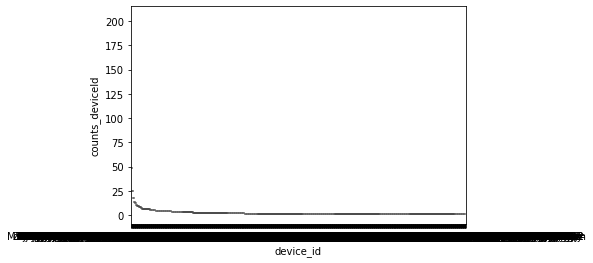

In [24]:
ax = sns.barplot(x="device_id", y="counts_deviceId", data=grp_by_device)

In [19]:
import plotly.express as px 
fig = px.scatter_mapbox(df.iloc[:,:], lat="latitude", lon="longitude", 
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

In [ ]:
def distance(lat1, long1, lat2, long2):
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(lat2 - lat1/2))**2 + cos(lat1) * cos(lat2) * (sin(lon2 - lon1/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

In [ ]:
max_distance = 0
for i in df.shape[0]:
    if square_distance(*pair) > max_square_distance:
        max_square_distance = square_distance(*pair)
        max_pair = pair

In [41]:
df.shape

(25319, 7)

### Analyse des données du  14 juin 2021

In [27]:
df

,device_id,latitude,longitude,datetime,hour,day,date
0,NGRtM2lhN3FtcWNyOTpmaXNpNm5sajJkdmQ5,30.388058,-9.420253,2021-05-31 22:04:38,22,31,2021-05-31
1,NGRtM2lhN3FtcWNyOTpmaXNpNm5sajJkdmQ5,30.388058,-9.420253,2021-05-31 22:06:09,22,31,2021-05-31
2,MzZuN2I5dDVqODhmODp2ZjVoNGtsc24wMW4=,32.036022,-3.050241,2021-05-31 21:10:54,21,31,2021-05-31
3,ZGxlOXFiNGxqZDM5OTpmcGE4cHB1cnM2cTNk,32.308627,-9.211986,2021-05-31 22:24:38,22,31,2021-05-31
4,ZHMzNHFsMmk3NjloNzozbDlrOTVwcGdmbjM4,33.564917,-7.572878,2021-05-31 21:04:15,21,31,2021-05-31
...,...,...,...,...,...,...,...
53023315,MnNnZDZjbWM5NHViczpkcjcwZTlqM2l1Nm0x,35.749715,-5.794415,2021-06-30 13:16:33,13,30,2021-06-30
53023316,NWFpNjJsdmVldjU5bDo2Nm42bmw1bHByNzQz,35.756844,-5.801536,2021-06-30 16:48:17,16,30,2021-06-30
53023317,MmVnMTNwNWY0N2NubjpkM2huM2ZwdGZtb2Ey,35.761161,-5.840499,2021-06-30 13:16:14,13,30,2021-06-30
53023318,YjhwMzFmNmIwb3UycTo5bGcyc2hva3FyaWwx,35.768578,-5.823996,2021-06-30 13:16:04,13,30,2021-06-30


In [28]:
df=df.loc[(df['day']==14)&(df['hour']>=12)&(df['hour']<=14)]
df=df.loc[(df['latitude']<34.038407) &(df['latitude']>33.915500)&(df['longitude']>-6.914729)&(df['longitude']<-6.789333)]


In [29]:
df

,device_id,latitude,longitude,datetime,hour,day,date
21801153,NGU1ZDhmY2Y0ZnU0aDo2b3A5OGxxdmcxNWVs,34.017395,-6.834730,2021-06-14 12:06:20,12,14,2021-06-14
21801154,NGU1ZDhmY2Y0ZnU0aDo2b3A5OGxxdmcxNWVs,34.017395,-6.834730,2021-06-14 12:06:19,12,14,2021-06-14
21801155,NGU1ZDhmY2Y0ZnU0aDo2b3A5OGxxdmcxNWVs,34.017395,-6.834730,2021-06-14 12:06:59,12,14,2021-06-14
21801156,NGU1ZDhmY2Y0ZnU0aDo2b3A5OGxxdmcxNWVs,34.017395,-6.834730,2021-06-14 12:03:18,12,14,2021-06-14
21801157,NGU1ZDhmY2Y0ZnU0aDo2b3A5OGxxdmcxNWVs,34.017395,-6.834730,2021-06-14 12:03:10,12,14,2021-06-14
...,...,...,...,...,...,...,...
24163548,NWcyNmdoNGJhZ25vNzplazduYzBxcjRuOGlo,34.020463,-6.843531,2021-06-14 14:15:50,14,14,2021-06-14
24163549,NWcyNmdoNGJhZ25vNzplazduYzBxcjRuOGlo,34.020463,-6.843531,2021-06-14 13:38:40,13,14,2021-06-14
24163550,NWcyNmdoNGJhZ25vNzplazduYzBxcjRuOGlo,34.020463,-6.843531,2021-06-14 13:35:37,13,14,2021-06-14
24163551,NWcyNmdoNGJhZ25vNzplazduYzBxcjRuOGlo,34.020463,-6.843531,2021-06-14 13:44:57,13,14,2021-06-14


In [30]:
grp_by_device=df.groupby('device_id').datetime.count().sort_values(ascending=False).reset_index().rename(columns={'datetime':'counts_deviceId'})
grp_by_device

,device_id,counts_deviceId
0,Y2FzMTNqMmJrcnU1NjpiNHB0N200cGVkY2Zq,266
1,YzltcGNhZzhqdDRwNTo1OTMwZWk2NWZudHJh,239
2,ZG9kaTNnZ3YyY2RhNjo1dGpsZmQ5cmI3M2tl,205
3,MjhsYjhzcmd0c2hsODozcXBhYWtyNTgzODdj,204
4,Zm9iMWNtbG9pNm01aTpjN3I2cHVxZnQ5Zjgx,203
...,...,...
4609,ODM5bGZyZG5tY2x2djpjZnE4dHNoMzE5ODJh,1
4610,ODNuOXNpcWpsczd2djpzN25ham0xZzRjcWQ=,1
4611,ODNudjczb3AzbzI3djo0ZzFqcmt2YnN2MjI3,1
4612,ODQwajI4bWIwa2dkbjo1bmgxYXZmbzh1NnZ1,1


In [32]:
grp_by_device.describe()

,counts_deviceId
count,4614.000000
mean,5.487430
std,13.244968
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,266.000000


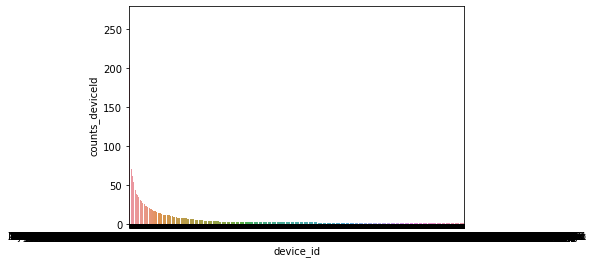

In [31]:
ax = sns.barplot(x="device_id", y="counts_deviceId", data=grp_by_device)

In [33]:
import plotly.express as px 
fig = px.scatter_mapbox(df.iloc[:,:], lat="latitude", lon="longitude", 
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

In [ ]:
import numpy as np

np.array(df['latitude'])
np.array(df['longitude'])